In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs, in_size, out_size, activation_function = None):
    Weights = tf.Variable(tf.random_uniform([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1,out_size])) + 0.1 # 不推荐设置为0
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape)
y_data = np.square(x_data) - 0.5 + noise
#print(x_data)

In [4]:
# 假设隐层有10个神经元，输出层有1个神经元
xs = tf.placeholder(tf.float32,[None,1])
ys = tf.placeholder(tf.float32, [None,1])
layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
predition = add_layer(layer1, 10, 1, activation_function=None)

loss = tf.reduce_mean(tf.square(y_data - predition),reduction_indices=[1])
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
        

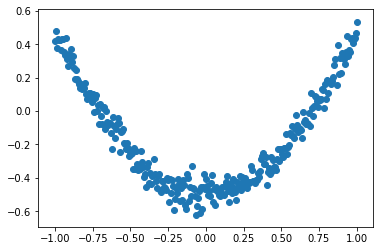

In [5]:
#显示真实数据
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()

In [6]:
for i in range(1000):
    sess.run(train_step, feed_dict={xs:x_data,ys:y_data})
    if i % 50 == 0:
        #print(sess.run(loss,feed_dict={xs:x_data,ys:y_data}))
        try:
            ax.lines.remove(lines[0])
        except Exception:
            pass
        prediction_value = sess.run(predition, feed_dict={xs:x_data})
        lines = ax.plot(x_data, prediction_value, 'r-', lw=5)
        plt.pause(0.1)